In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_union
from sklearn.cluster import KMeans

In [ ]:
tsla = pd.read_csv("tsla.csv").drop("Unnamed: 0", axis=1)
att = pd.read_csv("att.csv").drop("Unnamed: 0", axis=1)
ko = pd.read_csv("ko.csv").drop("Unnamed: 0", axis=1)

In [ ]:
tsla["Price"] = tsla.Price.str.replace(",", "").astype(float)

In [ ]:
stock_df = pd.read_csv("stock_df.csv").drop("Unnamed: 0", axis=1)
metrics_df = pd.read_csv("metrics.csv").drop("Unnamed: 0", axis=1).dropna()

metrics_df["ROEttm"] = metrics_df["ReturnOnEquityTTM"].replace(-99999.990, -3.21)
stock_df

,v,vw,o,c,h,l,t,n,10Y yield,monthly_inflation_exp,employment_rate,daily return,time
0,276990436.0,281.1395,284.64,288.42,288.5200,273.50,2020-03-10,2516869,0.76,2.1,14.7,0.000000,2020.191781
1,256734314.0,277.6211,280.70,274.36,281.9400,270.88,2020-03-11,2152459,0.82,2.1,14.7,-0.048748,2020.194521
2,393679530.0,255.6975,256.00,248.11,266.6600,247.68,2020-03-12,3709924,0.88,2.1,14.7,-0.095677,2020.197260
3,330252283.0,258.7299,263.09,269.32,271.4754,249.58,2020-03-13,2676722,0.94,2.1,14.7,0.085486,2020.200000
4,296792617.0,248.7405,241.18,239.85,256.9000,237.36,2020-03-16,2147728,0.73,2.1,14.7,-0.109424,2020.208219
...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,132374005.0,425.9146,432.66,421.95,433.2600,421.35,2022-02-23,1166037,1.99,5.0,3.6,-0.017739,2022.145205
539,213923446.0,419.7499,411.02,428.30,428.7600,410.64,2022-02-24,2316981,1.96,5.0,3.6,0.015049,2022.147945
540,121785659.0,434.3466,429.61,437.75,437.8400,427.86,2022-02-25,1141900,1.97,5.0,3.6,0.022064,2022.150685
541,145594529.0,434.5719,432.03,436.63,438.2000,430.70,2022-02-28,1305973,1.83,5.0,3.6,-0.002559,2022.158904


In [ ]:
metric_xtrain = metrics_df[["Beta", "ROEttm"]]#.dropna(axis=0)

cluster_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=3)
)

cluster_model.fit(metric_xtrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

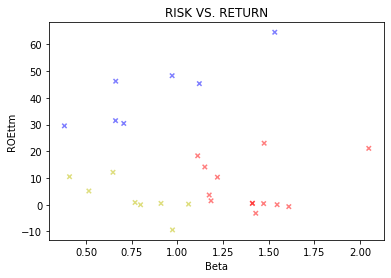

In [ ]:
clusters = pd.Series(cluster_model[1].labels_).map({
    0: "r",
    1: "b",
    2: "y",
    3: "g",
    4: "black"
})

metric_xtrain.plot.scatter(x="Beta", y="ROEttm", 
                     c=clusters, marker="x", alpha=.5, title="RISK VS. RETURN")

In [ ]:
metrics_df["cluster"] = cluster_model[1].labels_
metrics_df.groupby("cluster").ROEttm.mean(), metrics_df.groupby("cluster").Beta.mean()

(cluster
 0     6.871000
 1    42.230000
 2     2.468125
 Name: ROEttm, dtype: float64, cluster
 0    1.404000
 1    0.863000
 2    0.761125
 Name: Beta, dtype: float64)

In [ ]:
metrics_df.groupby("cluster").ROEttm.std(), metrics_df.groupby("cluster").Beta.std()

(cluster
 0     9.245989
 1    12.759138
 2     6.803860
 Name: ROEttm, dtype: float64, cluster
 0    0.253901
 1    0.379645
 2    0.225507
 Name: Beta, dtype: float64)

In [ ]:
metrics_df[metrics_df.cluster == 0]

In [ ]:
metrics_df[metrics_df.cluster == 1]

In [ ]:
metrics_df[metrics_df.cluster == 2]

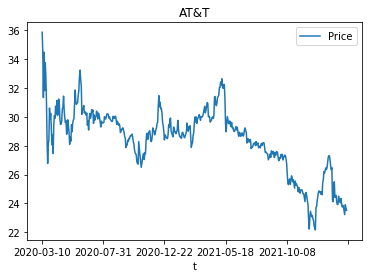

In [ ]:
att.set_index("t").Price.plot.line(legend=True, title="AT&T")

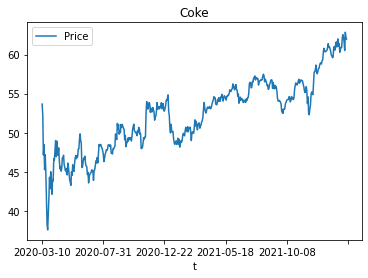

In [ ]:
ko.set_index("t").Price.plot.line(legend=True, title="Coke")

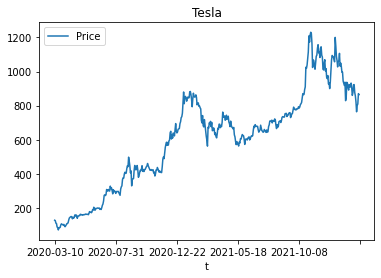

In [ ]:
tsla.set_index("t").Price.plot.line(legend=True, title="Tesla")

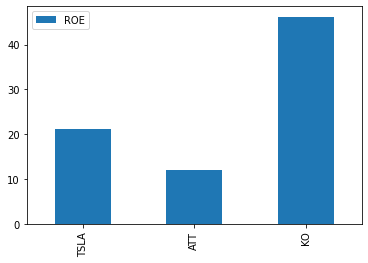

In [ ]:
pd.Series({"TSLA": metrics_df[metrics_df["Symbol"] == "TSLA"].ROEttm.iloc[0], "ATT": metrics_df[metrics_df["Symbol"] == "T"].ROEttm.iloc[0], "KO": metrics_df[metrics_df["Symbol"] == "KO"].ROEttm.iloc[0]}, name="ROE").plot.bar(legend=True)

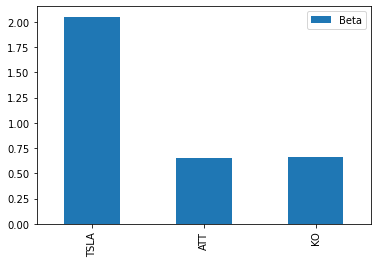

In [ ]:
pd.Series({"TSLA": metrics_df[metrics_df["Symbol"] == "TSLA"].Beta.iloc[0], "ATT": metrics_df[metrics_df["Symbol"] == "T"].Beta.iloc[0], "KO": metrics_df[metrics_df["Symbol"] == "KO"].Beta.iloc[0]}, name="Beta").plot.bar(legend=True)

#MACHINE LEARNING BELOW

######THE MARKET

In [ ]:
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

pipeline.fit(stock_df["time"].to_frame(), stock_df.c)

y_new_ = pd.Series(pipeline.predict(X=stock_df["time"].to_frame()), index=y_train.index)

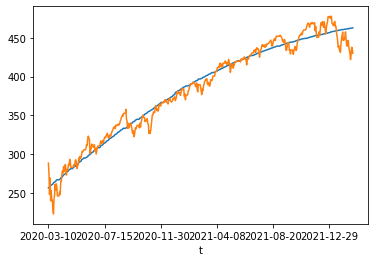

In [ ]:
y_new_.plot.line()
stock_df.set_index("t")["c"].plot.line()

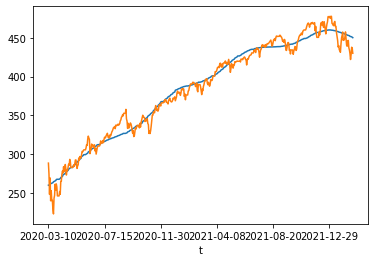

In [ ]:
pip = make_pipeline(
    make_union(
        PolynomialFeatures(degree=3, include_bias=False),
        FunctionTransformer(lambda t: np.sin(2 * np.pi * 2 * t)),
        FunctionTransformer(lambda t: np.cos(2 * np.pi * 2 * t))
    ),
    LinearRegression()
)

pip.fit(stock_df["time"].to_frame(), stock_df.c)
y_pred_ = pd.Series(pip.predict(X=stock_df["time"].to_frame()), index=y_train.index)

y_pred_.plot.line()
stock_df.set_index("t")["c"].plot.line()

In [ ]:
metrics_df.to_csv("metrics_ml.csv")
stock_df.to_csv("spy_ml.csv")
tsla.to_csv("tsla_ml.csv")
att.to_csv("att_ml.csv")
ko.to_csv("ko_ml.csv")